<a href="https://colab.research.google.com/github/SasiwimonV/bsc_dpdm22/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# ติดตั้งไลบรารี statsmodels

# Import ไลบรารีและโมดูลที่ใช้ในการสร้างโมเดล ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd

# ไฟล์ Excel
file_path = '/content/drive/MyDrive/ARIMA/ความชื้น-จ.ขอนแก่น.xlsx'
sheet_name = 'Sheet2'

# ใช้ฟังก์ชัน read_excel เพื่ออ่านข้อมูล
data = pd.read_excel(file_path, sheet_name=sheet_name)

# แสดงตัวอย่างข้อมูล
print(data.head())


   เวลา  ความชื้น
0     1        83
1     2        92
2     3        86
3     4        80
4     5        86


In [73]:
data = data.rename(columns={'ความชื้น': 'ความชื้น'})

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/di

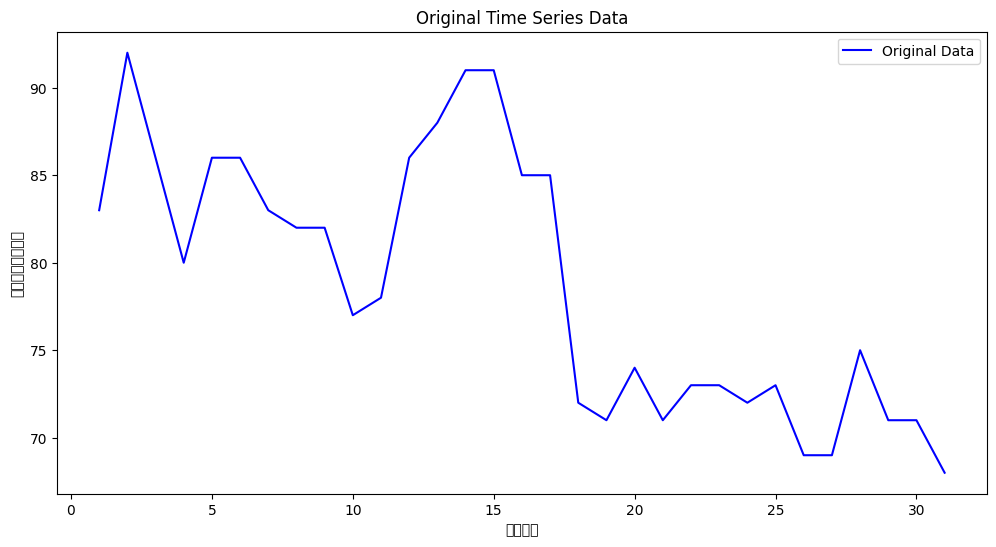

In [74]:
# สร้างกราฟข้อมูลเวลา
plt.figure(figsize=(12, 6))
plt.plot(data['เวลา'], data['ความชื้น'], label='Original Data', color='blue')
plt.xlabel('เวลา')
plt.ylabel('ความชื้น')
plt.legend()
plt.title('Original Time Series Data')
plt.show()

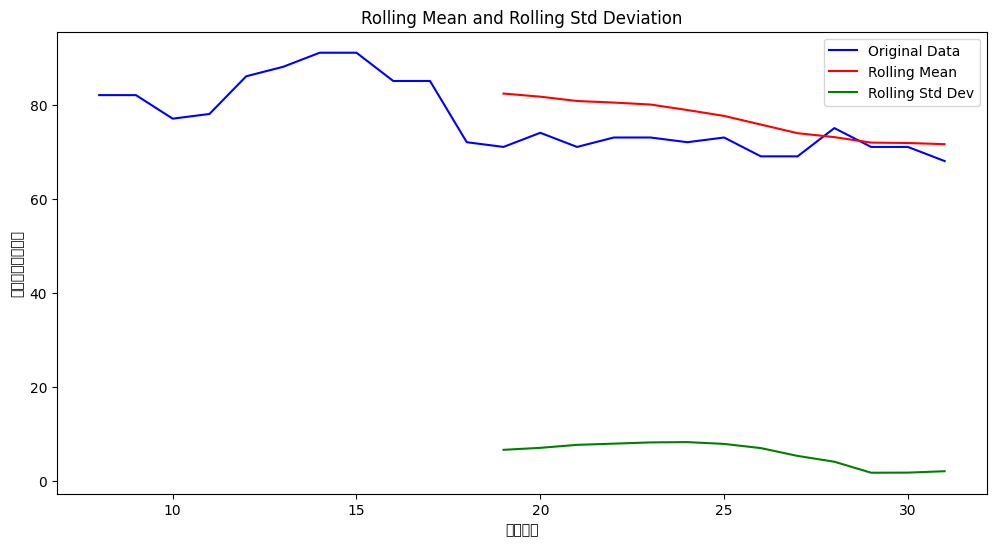

In [89]:
# คำนวณค่า Rolling Mean และค่า Rolling Standard Deviation
rolling_mean = data['ความชื้น'].rolling(window=12).mean()
rolling_std = data['ความชื้น'].rolling(window=12).std()

# พล็อตค่า Rolling Mean และค่า Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(data['เวลา'], data['ความชื้น'], label='Original Data', color='blue')
plt.plot(data['เวลา'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(data['เวลา'], rolling_std, label='Rolling Std Dev', color='green')
plt.xlabel('เวลา')
plt.ylabel('ความชื้น')
plt.legend()
plt.title('Rolling Mean and Rolling Std Deviation')
plt.show()


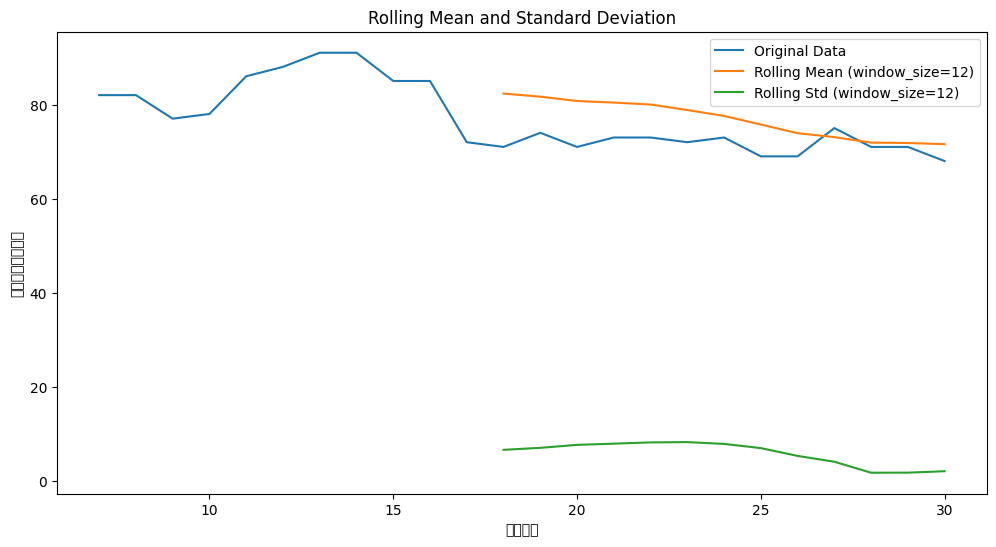

Augmented Dickey-Fuller Test Results:
Test Statistic                 -1.198234
p-value                         0.674355
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
p-value > 0.05: ข้อมูล non-stationary


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/di

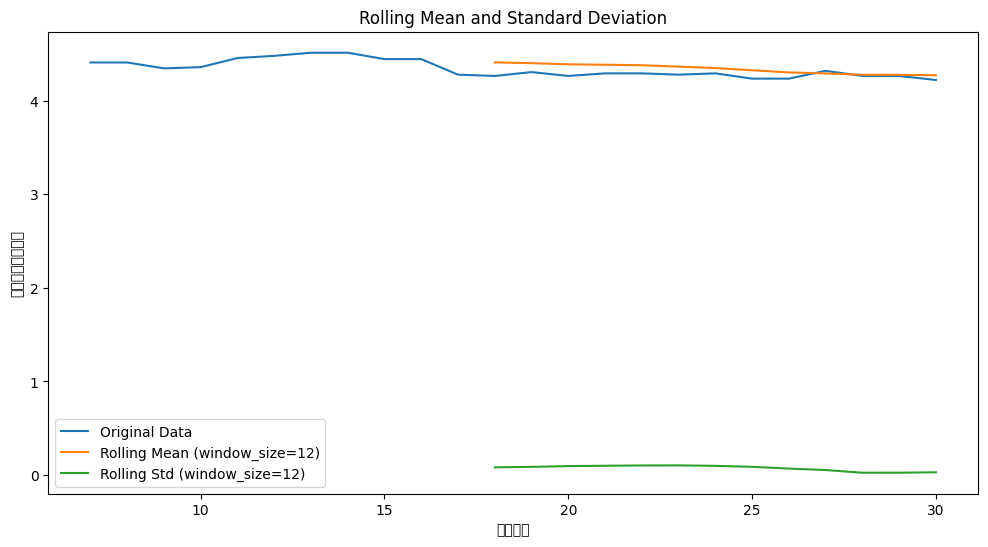

Augmented Dickey-Fuller Test Results:
Test Statistic                 -1.198585
p-value                         0.674204
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
p-value > 0.05: ข้อมูล non-stationary


In [90]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, column_name, window_size=12):
    # คำนวณค่าเฉลี่ยเคลื่อนที่ (Moving Average) และค่าความแปรปรวน (Standard Deviation) โดยใช้หน้าต่างขนาด window_size
    rolling_mean = data[column_name].rolling(window=window_size).mean()
    rolling_std = data[column_name].rolling(window=window_size).std()

    # พล็อตกราฟเพื่อดูการเปรียบเทียบค่าเฉลี่ยเคลื่อนที่และค่าความแปรปรวนกับข้อมูลต้นฉบับ
    plt.figure(figsize=(12, 6))
    plt.plot(data[column_name], label='Original Data')
    plt.plot(rolling_mean, label='Rolling Mean (window_size={})'.format(window_size))
    plt.plot(rolling_std, label='Rolling Std (window_size={})'.format(window_size))
    plt.xlabel('เวลา')
    plt.ylabel('ความชื้น')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend()
    plt.show()

    # ทดสอบความ stationary โดยใช้ Augmented Dickey-Fuller Test
    adf_test = adfuller(data[column_name], autolag='AIC')
    result = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        result['Critical Value (%s)' % key] = value

    print('Augmented Dickey-Fuller Test Results:')
    print(result)

    # ตรวจสอบความสถิติของข้อมูล
    if result['p-value'] <= 0.05:
        print("p-value <= 0.05: ข้อมูล stationary")
    else:
        print("p-value > 0.05: ข้อมูล non-stationary")

# ตรวจสอบความ stationary ของข้อมูลเริ่มต้น
check_stationarity(data, 'ความชื้น')

# ทำ Log Transformation ของข้อมูล
data['Log_Value'] = np.log(data['ความชื้น'])

# ตรวจสอบความ stationary หลังจากทำ Log Transformation
check_stationarity(data, 'Log_Value')



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/di

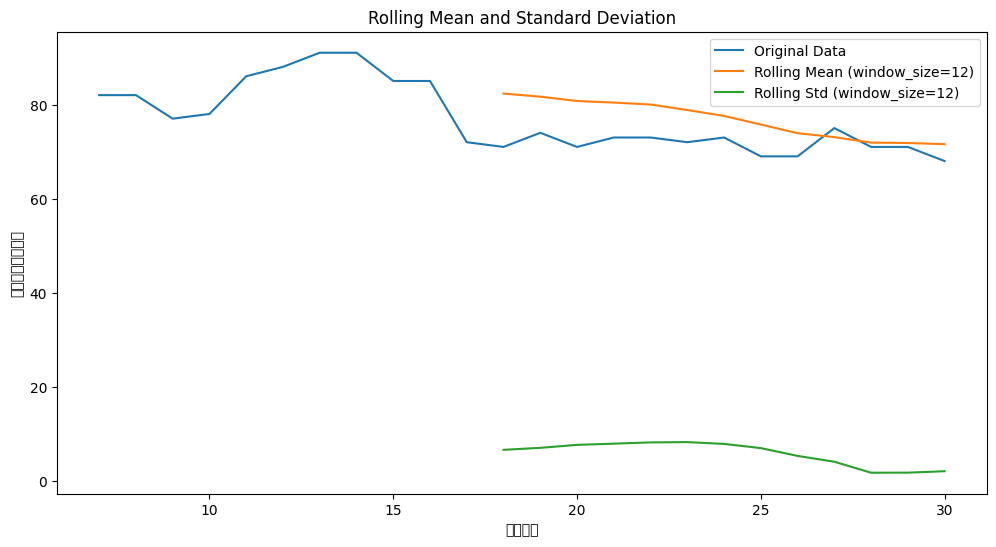

Augmented Dickey-Fuller Test Results:
Test Statistic                 -1.198234
p-value                         0.674355
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
p-value > 0.05: ข้อมูล non-stationary


In [87]:
# ทำการค่าความแตกต่างและเพิ่มคอลัมน์ใหม่ใน DataFrame
data['Differenced'] = data['ความชื้น'] - data['ความชื้น'].shift(1)

# ลบแถวที่มีค่า NaN ออก
data.dropna(inplace=True)


# ใช้ฟังก์ชันเพื่อตรวจสอบความ stationary ของคอลัมน์ 'ความชื้น'
check_stationarity(data, 'ความชื้น')



In [ ]:
# สร้างโมเดล ARIMA
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit(disp=0)

In [ ]:
# ทำนายค่า
forecast = model_fit.forecast(steps=10)  # ทำนายค่าในระหว่าง 10 ช่วงเวลาข้างหน้า

In [ ]:
# พล็อตกราฟข้อมูลและผลทำนาย
plt.plot(data)
plt.plot([None for _ in data] + [x for x in forecast])
plt.show()